# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 6 - Linear Regressions</div>
<div align="center"> Jonathan Holmes, (he/him)</div>

Let's make sure you have all the required packages

In [ ]:
# Let's make sure everything is running

# data libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

sns.set_theme(style="white")  # set option

# Statistics libraries
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

import itertools

# Jupyter library to show video
from IPython.display import YouTubeVideo

/var/folders/23/6hhxql6s4gx8qpsz5jbjby400000gn/T/ipykernel_83304/3006754616.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white') # set option


# A motivating example

- Today we will use the Advertising dataset.
- This dataset is available from the R package ISLR or on the [book's webpage](https://www.statlearning.com/resources-first-edition)

The data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [20]:
# Let me set my current directory using the %cd magic
%cd "~/Dropbox/_teaching/Old_Courses/ECO4199/2023/Data-Science-for-Social-Scientists/Class 06 - Linear Regressions/"

/Users/jonathanholmes/Library/CloudStorage/Dropbox/_teaching/Old_Courses/ECO4199/2023/Data-Science-for-Social-Scientists/Class 06 - Linear Regressions


In [21]:
ads = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
display(ads.info())
ads.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Prediction
- More generally, suppose that we observe a quantitative response Y 
- We also have p different predictors, X1,X2, . . .,Xp. 
- We assume that there is some relationship between Y and X = (X1,X2, . . .,Xp)
- This can be written in the very general form:
$$ Y = f(\mathbf{X}) + \varepsilon $$

# Making sense of the formula
$$ Y = f(\mathbf{X}) + \varepsilon $$
- Here f is some fixed but unknown __function__ of X1, . . . , Xp, in the __population__
- $\varepsilon$  is a random __error term__, which is independent of X and has mean zero. 
- In this formulation, $f$ represents the _systematic_ information that X provides about Y


# What is this function?

- You may be wondering what is this function about?
- Turns out you already kow at least one such function


\begin{equation*}
y= f(x) + \varepsilon = \beta_0 + \beta_1 x + \varepsilon
\end{equation*}

- $\beta_0$ and $\beta_1$ are two unknown __parameters__ that represent
the __intercept__ and __slope__ terms in the linear model.

# Simple linear regression
- The __simple linear regression__ is the simplest way to predict a __quantitative response__ of Y
- Here a single __predictor variable__ X influences Y. 
- It assumes that there is approximately a linear relationship between X and Y. 
- Before predicting Y, we first need to estimate these parameters.
- Let's estimate three distinct simple linear regressions, one for each independent variable

In [22]:
ads.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

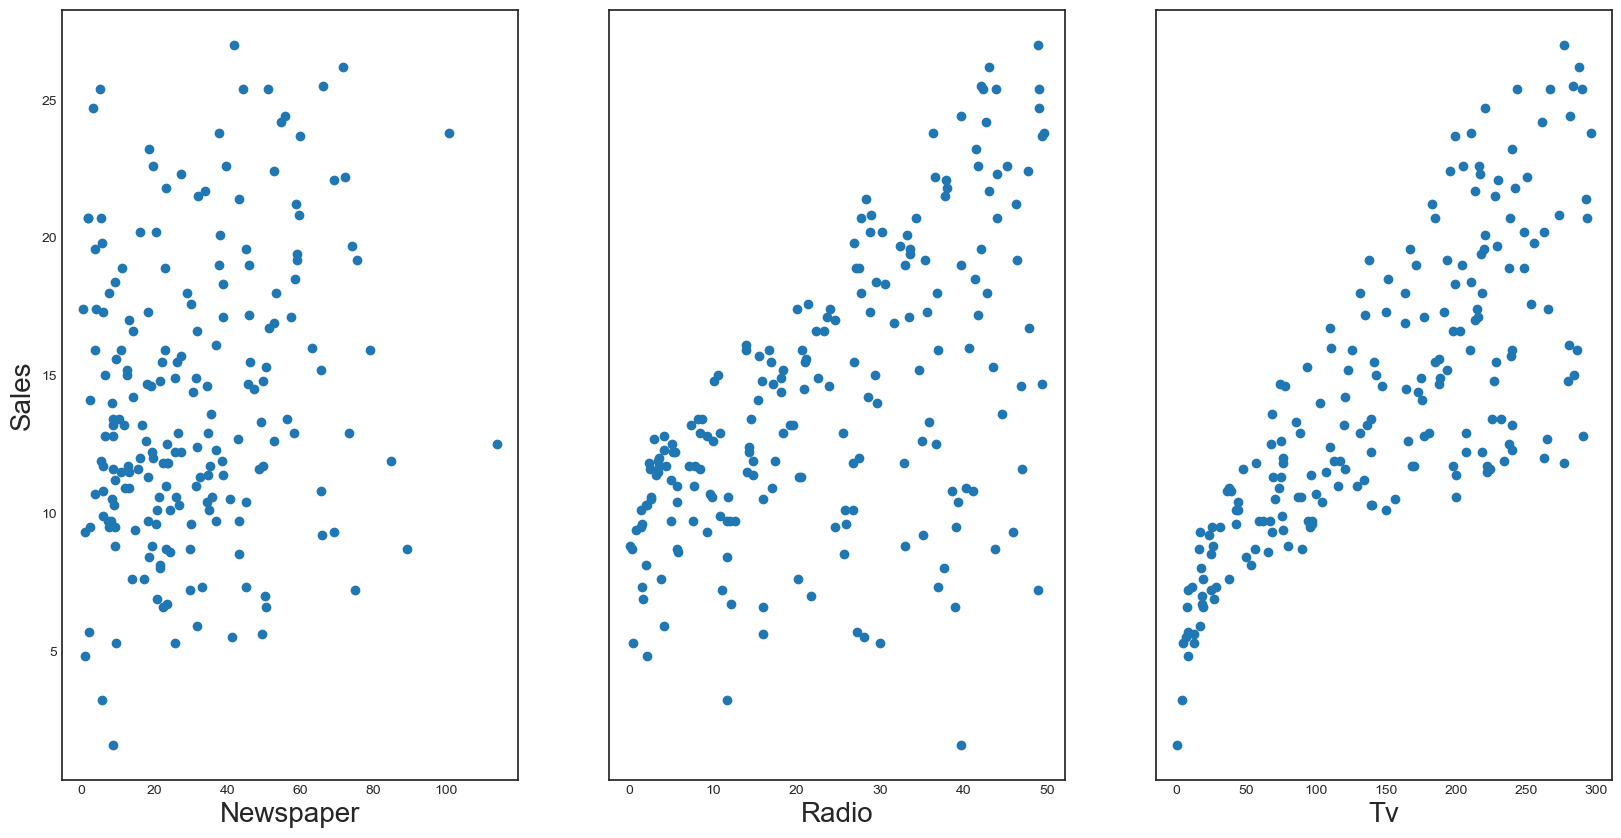

In [23]:
# Scatter plot
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
for i, v in enumerate(np.sort(ads.columns[ads.columns!='Sales'].tolist())):
    axes[i].scatter(ads[v],ads['Sales'])
    axes[i].set_xlabel(v.capitalize(), fontsize=20)
    
axes[0].set_ylabel("Sales", fontsize=20)

# Econometrics Review

What is the ordinary least square method minimizing?

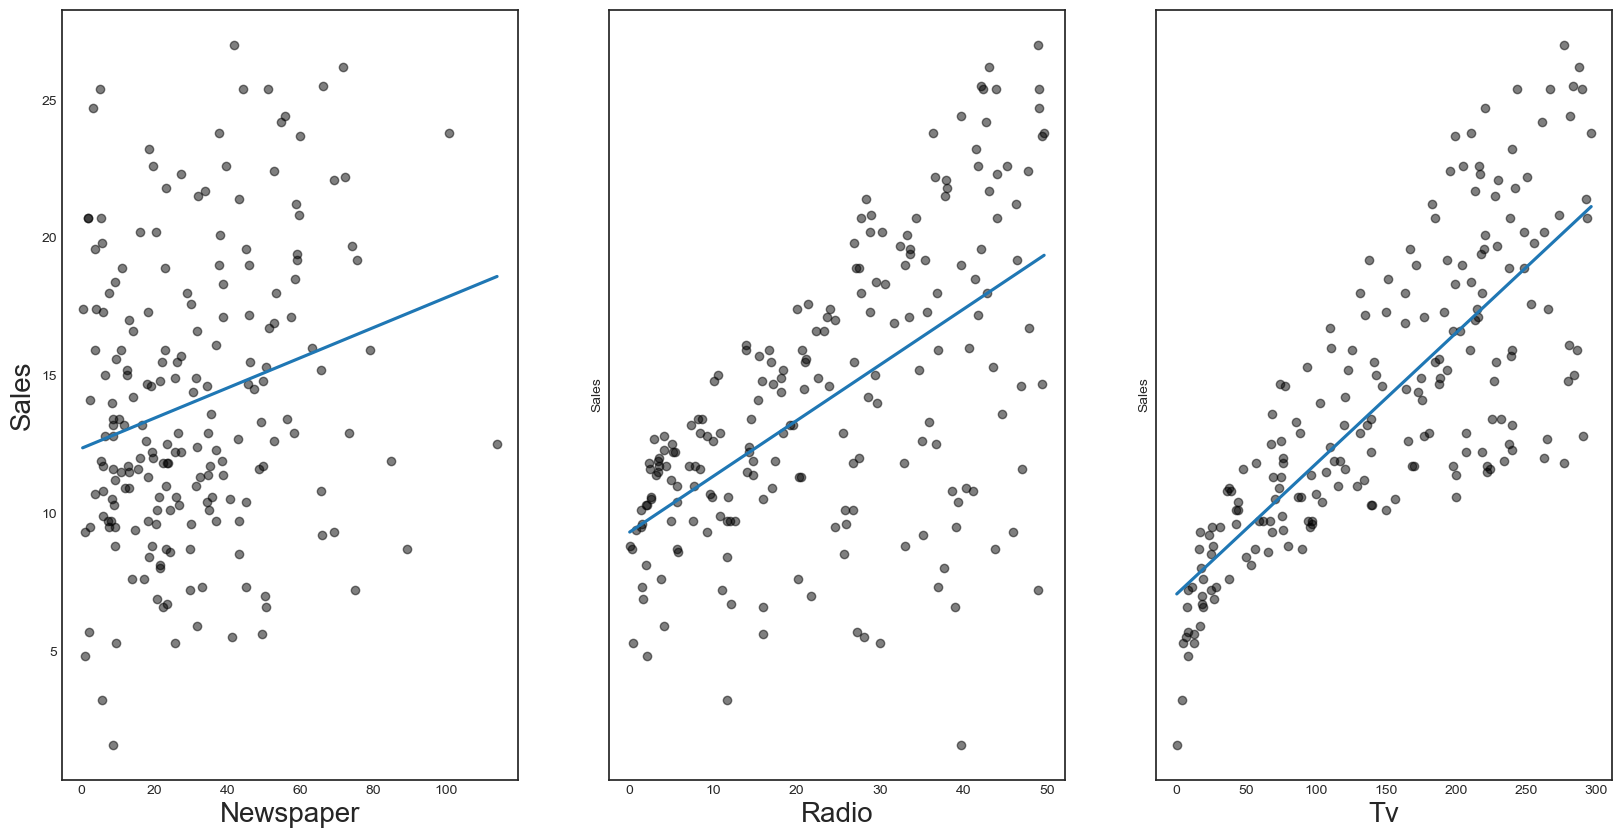

In [7]:
# Scatter plot
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
for i, v in enumerate(np.sort(ads.columns[ads.columns!='Sales'].tolist())):
    sns.regplot(data=ads, x=v, y='Sales', order=1, ci=None, ax=axes[i],scatter_kws={"color": "black", "alpha":.5})
    axes[i].set_xlabel(v.capitalize(), fontsize=20)
    
axes[0].set_ylabel("Sales", fontsize=20)
plt.show()

In [8]:
results = smf.ols('Sales ~ TV ', data=ads).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           1.47e-42
Time:                        14:21:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

## In-Class Exercise #1 - Test Your Econometrics Knowledge! 

Question #1: Find the following information in the table: 
- What are the independent and dependent variable(s) are in this table? 
- How many observations are there in this regression? 


Question #2: Identify each of the following coefficients in this table: 

|   | coef | std err | t | P>abs(t) | [.025 | .975] |  
| --- | :-: | :-: | :-: | :-: | :-: | :-: |
| Intercept |     7.0326  |    0.458  |  15.360  |    0.000  |     6.130  |     7.935 |
| TV        |     0.0475  |    0.003  |   17.668 |    0.000  |     0.042  |     0.053 |

- $\hat{\beta_0}$: 
- $\hat{\beta_1}$: 
- The standard error of $\hat{\beta_1}$: 
- The 95% confidence interval of $\hat{\beta_1}$: 
- The 95\% confidence interval of $\hat{\beta_0}$:

Question #3: Is more TV spending associated with higher sales? What do you look at in the table to figure this out? 


Question #4: What does the column $P> |t|$ mean? 

# The OLS Estimator of $\beta_1$


- The formula for $\hat{\beta}_1$, which can be written:
\begin{equation*}
\hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}
\end{equation*}
- Again equivalently (after dividing top and bottom by $n - 1$):
\begin{equation*}
\hat{\beta}_1 = \frac{s_{XY}}{s_X^2}
\end{equation*}
- So in the linear regression model with one regressor, the OLS estimator of $\beta_1$ is the sample covariance of $X$ and $Y$ divided by the sample variance of $X$


In [9]:
# beta_1 = covariance of X and Y over the variance of X:
cov_xy=ads[["Sales","TV"]].cov().iloc[0,1] # covariance of X and Y
var_x=ads.TV.var() # Variance of X
beta=cov_xy/var_x # beta_1, the slope, is the ratio of the 2
print("The covariance of X and Y is {0}.\nThe variance of X is {1}. \n\u03B2 is {2} as expected!".format(cov_xy.round(2),round(var_x,2),beta.round(4)))


The covariance of X and Y is 350.39.
The variance of X is 7370.95. 
β is 0.0475 as expected!


# Interpretation of $\hat{\beta}_0$ and $\hat{\beta}_1$

-  $\hat{\beta}_0$ is the intercept: it tells you where to position the line along the y-axis
- $\hat{\beta}_1$ is the slope: it tells you how steep is the line
- Remember how to interpret these in our example?

## Visualizing Ordinary Least Squares

OLS = Ordinary _Least Squares_ 

What does "Least Squares" refer to? 






ANSWER: It refers to _minimizing_ the sum of _squared residuals_ 

Equivalent: 
- Minimize RSS (residual sum of squares)
- Minimize the  MSE (mean squared error)



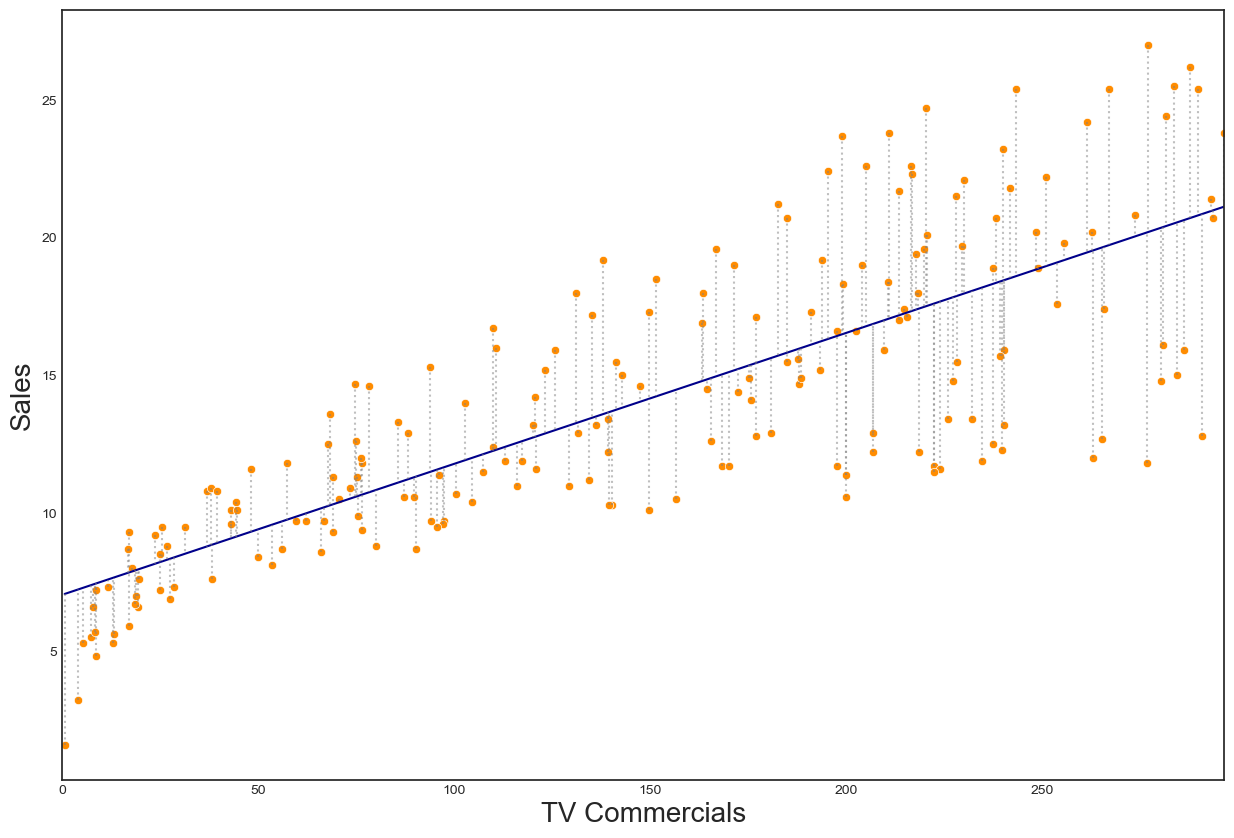

In [10]:
# Scatter plot
fig, ax = plt.subplots(1,1, figsize=(15,10))

# plot {y_i, x_i}
sns.scatterplot(data=ads,x='TV',y='Sales',color='darkorange', ax=ax )
ax.set_xlabel('TV Commercials', fontsize=20)
ax.set_ylabel("Sales", fontsize=20)
ax.set_xlim(xmin=0, xmax=ads['TV'].max())

# line of best fit
results = smf.ols('Sales ~ TV ', data=ads).fit() # regress sales on Tv (see below)
alpha=results.params['Intercept']
beta=results.params['TV']
ads['line of best fit']=alpha+beta*ads['TV']
sns.lineplot(data=ads, x='TV', y='line of best fit',color='darkblue', ax=ax)

# plot the residuals
ads['residuals'] = ads['line of best fit'] - ads['Sales']
for _, row in ads.iterrows():    
    ax.vlines(row['TV'],row['Sales'],row['Sales']+row['residuals'], color='grey',alpha=.5,linestyle=":")

plt.show()

# OLS Regression

- As you probably remember the OLS regression find the $\beta_0$ and $\beta_1$ that minimize the residual sum of squares
- Let $\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1x_i$ be the prediction for Y based on the ith value of X.
- Then $e_i = y_i−\hat{y_i}$ represents the $i_{th}$ residual
    - This is the difference between the $i_{th}$ observed value (actual data) and the $i_{th}$ predicted value

- So the residual sum of squares (RSS) corresponds to 

$RSS = e^2_1 + e^2_2 + · · · + e^2_n$

or

$RSS = (y_1− \hat{\beta}_0− \hat{\beta}_1x_1)^2+(y_2− \hat{\beta}_0− \hat{\beta}_1x_2)^2+. . .+(y_n− \hat{\beta}_0− \hat{\beta}_1x_n)^2.$


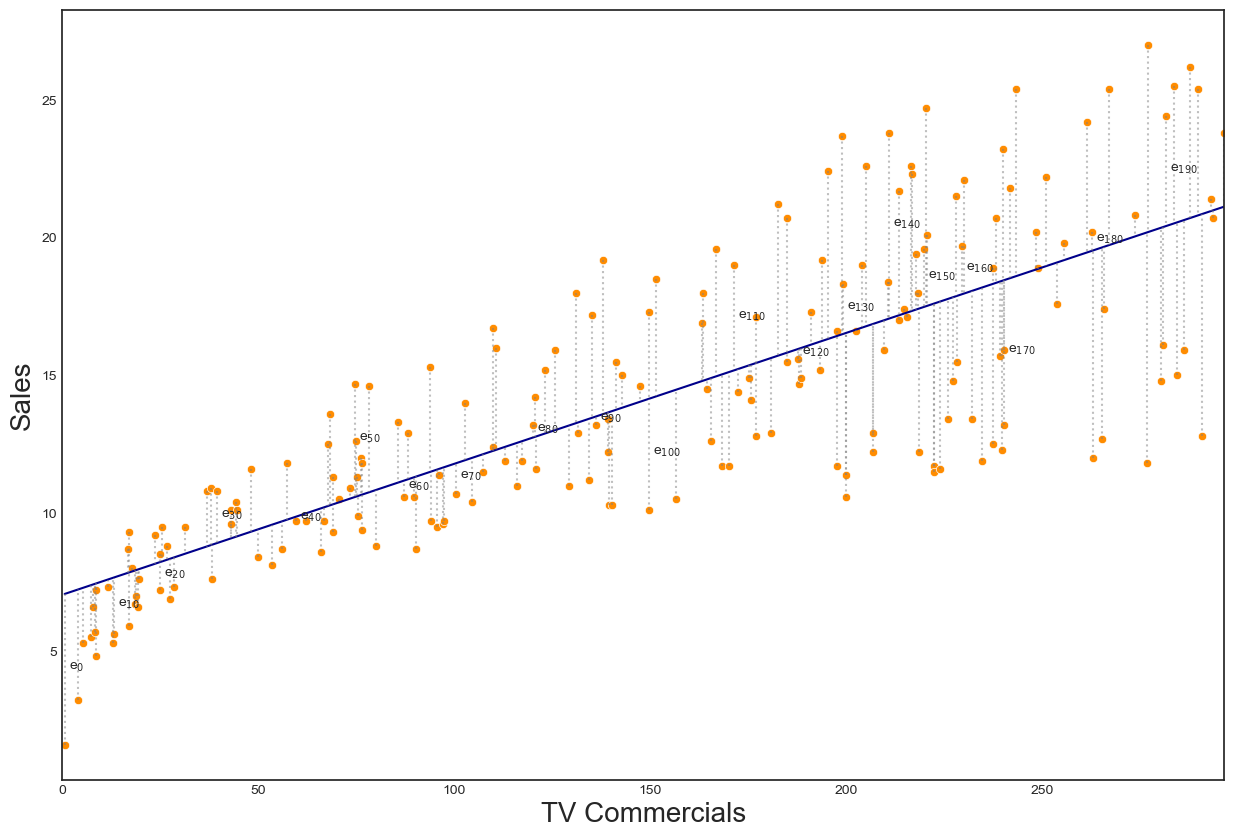

In [11]:
#%matplotlib widget

ads.sort_values('TV',inplace=True)
ads.reset_index(drop=True,inplace=True)

# Scatter plot
fig, ax = plt.subplots(1,1, figsize=(15,10))

# plot {y_i, x_i}
sns.scatterplot(data=ads,x='TV',y='Sales',color='darkorange', ax=ax )
ax.set_xlabel('TV Commercials', fontsize=20)
ax.set_ylabel("Sales", fontsize=20)
ax.set_xlim(xmin=0, xmax=ads['TV'].max())

# line of best fit
results = smf.ols('Sales ~ TV ', data=ads).fit() # regress sales on Tv (see below)
alpha=results.params['Intercept']
beta=results.params['TV']
ads['line of best fit']=alpha+beta*ads['TV']
sns.lineplot(data=ads, x='TV', y='line of best fit',color='darkblue', ax=ax)

# plot the residuals
ads['residuals'] = ads['line of best fit'] - ads['Sales']
for i, row in ads.iterrows():    
    ax.vlines(row['TV'],row['Sales'],row['Sales']+row['residuals'], color='grey',alpha=.5,linestyle=":")
    if i%10==0:
        ax.text(x=row['TV']+1, y=row['line of best fit']-(row['residuals']/2), s=f'e$_{{{str(i)}}}$' )

plt.show()

# Minimized?

- Let's prove that the results from an ols regression indeed minize the RSS
- To do so we will use the [Statsmodels API](
https://www.statsmodels.org/stable/index.html)

In [12]:
# Regress Sales on a constant term and TV
results = smf.ols('Sales ~ TV ', data=ads).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           1.47e-42
Time:                        14:22:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [13]:
ads['alpha_hat']=results.params['Intercept']
ads['beta_hat']=results.params['TV']
ads['Sales_hat']=ads['alpha_hat']+ ads['beta_hat']* ads['TV']
ads['Residual']=ads['Sales']- ads['Sales_hat']
ads['RSS']=np.square(ads['Sales']- ads['Sales_hat'])
ads.head() 

,TV,Radio,Newspaper,Sales,line of best fit,residuals,alpha_hat,beta_hat,Sales_hat,Residual,RSS
0,0.7,39.6,8.7,1.6,7.065869,5.465869,7.032594,0.047537,7.065869,-5.465869,29.875726
1,4.1,11.6,5.7,3.2,7.227494,4.027494,7.032594,0.047537,7.227494,-4.027494,16.220706
2,5.4,29.9,9.4,5.3,7.289291,1.989291,7.032594,0.047537,7.289291,-1.989291,3.957280
3,7.3,28.1,41.4,5.5,7.379611,1.879611,7.032594,0.047537,7.379611,-1.879611,3.532938
4,7.8,38.9,50.6,6.6,7.403379,0.803379,7.032594,0.047537,7.403379,-0.803379,0.645418


In [14]:
print(f"The RSS from this OLS regression is {ads['RSS'].sum().round(1)}")
print("The residual sums up to: {}! By construction! (see the first order condition below)".format(round(np.abs(ads['Residual'].sum()),1)))

The RSS from this OLS regression is 2102.5
The residual sums up to: 0.0! By construction! (see the first order condition below)


- What happends to the RSS if we keep the intercept, $\alpha$, constant and change $\beta$?
- In other words, can we find a $\beta$ that improves over the current $\hat{\beta}$

In [15]:
# prepare list for a new dataframe
betas=[beta for beta in np.arange(0.03, 0.065, 0.00025)] # all values of beta we will try
#betas=[beta for beta in np.arange(0.03, 0.065, 0.005)] # all values of beta we will try
RSSs=[] # Create empty list to store RSS
# Change beta_hat by some small amounts

for beta in betas: # loop over all the
    ads['Sales_hat_2']=ads['alpha_hat']+ beta* ads['TV'] # predict sales given new beta
    ads['RSS_2']=np.square(ads['Sales']- ads['Sales_hat_2']) # square the residual
    RSSs.append(ads.RSS_2.sum()) # take the sum of the squared residuals and append to the RSSs list

data={'beta':betas, 'RSS': RSSs} # Put in a dictionary
df = pd.DataFrame(data=data) # Turn dictionary to dataframe
df.head()

,beta,RSS
0,0.03000,3883.494983
1,0.03025,3833.078547
2,0.03050,3783.386001
3,0.03075,3734.417345
4,0.03100,3686.172579


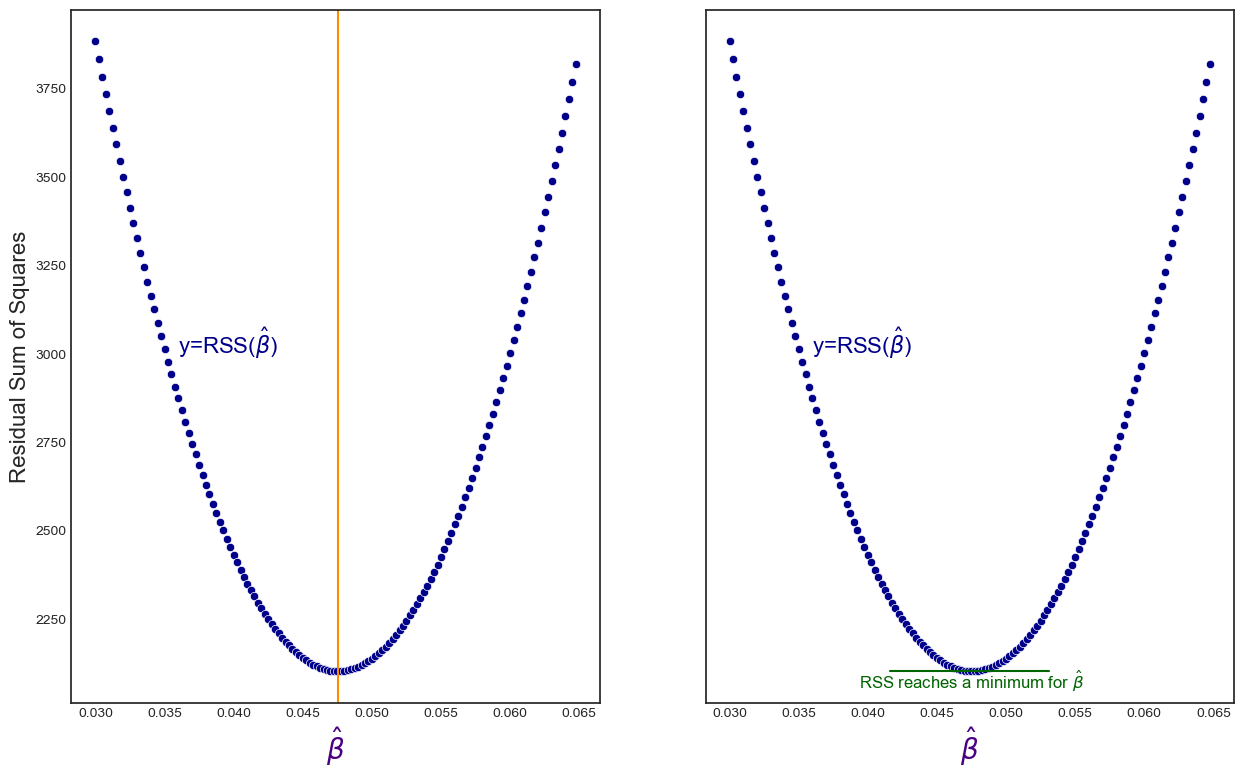

In [16]:
beta=results.params['TV']
fig, axes=plt.subplots(1,2, sharey=True, figsize=(15,9))
sns.scatterplot(data=df, x="beta", y="RSS", ax=axes[0], color='darkblue')
axes[0].set_xlabel(r"$\hat{\beta}$", fontsize=20, color='indigo')
axes[0].set_ylabel("Residual Sum of Squares", fontsize=16)
axes[0].axvline(beta,color='darkorange')
axes[0].text(x=0.036, y=3000, s=r"y=RSS($\hat{\beta}}$)", color='darkblue',fontsize=16)



sns.scatterplot(data=df, x="beta", y="RSS", ax=axes[1], color='darkblue')
axes[1].set_xlabel(r"$\hat{\beta}$", fontsize=20, color='indigo')
axes[1].axhline(y=ads['RSS'].sum(),color='darkgreen', xmin=0.35, xmax=0.65)
axes[1].text(x=beta, y=ads['RSS'].sum()-50, s=r"RSS reaches a minimum for $\hat{\beta}}$", ha="center",color='darkgreen',fontsize=12)
axes[1].text(x=0.036, y=3000, s=r"y=RSS($\hat{\beta}}$)", color='darkblue',fontsize=16)


plt.show()

We can also visualize the way the RSS changes as we change both the intercept and the slope

In [17]:
# Regression coefficients (Ordinary Least Squares)
regr = LinearRegression()

X = scale(ads.TV, with_mean=True, with_std=False).reshape(-1,1) # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
y = ads.Sales

regr.fit(X,y)
print("\nCompare with the results above:")
print(f"Intercept for the centered data is: {regr.intercept_}.")
print(f"The slope coefficient is: {regr.coef_[0]}.")

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_[0]-0.02, regr.coef_[0]+0.02, 50)

xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/100
print(f"The minimum residual sum of squares is {min_rss}.")


Compare with the results above:
Intercept for the centered data is: 14.0225.
The slope coefficient is: 0.04753664043301975.
The minimum residual sum of squares is 21.025305831313513.


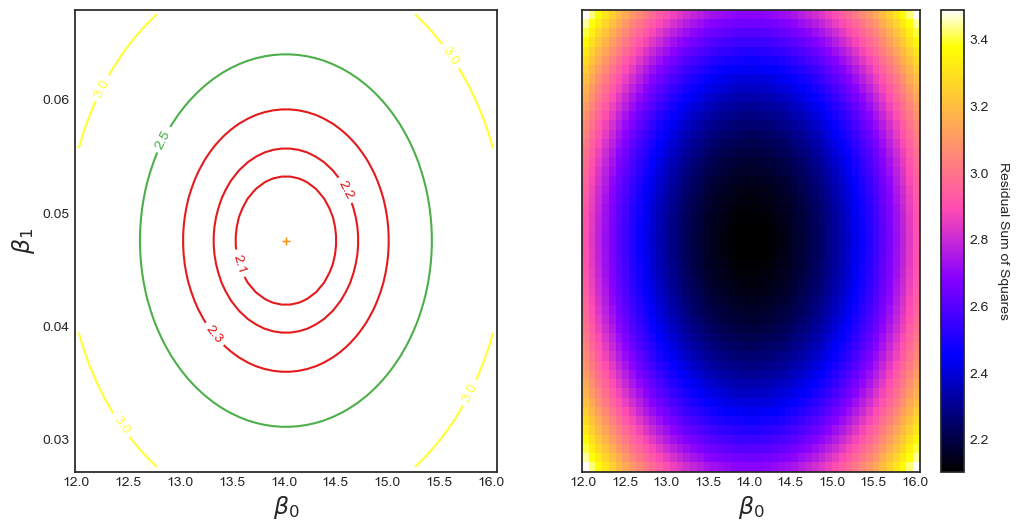

In [18]:
fig, axes =plt.subplots(1,2,figsize=(12,6), sharex=True, sharey=True)

# contour plot
CS=axes[0].contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3, 3.5])
axes[0].plot(regr.intercept_, regr.coef_[0],  color='darkorange', marker='+', label=min_RSS)
axes[0].clabel(CS, CS.levels, inline=True, fmt='%1.1f', fontsize=10)

#heatmap
CSS=axes[1].pcolormesh(xx, yy, Z, cmap='gnuplot2', vmin=np.abs(Z).min(), vmax=np.abs(Z).max(), shading='auto')



# settings common to both plots
axes[0].set_xlabel(r'$\beta_0$', fontsize=17)
axes[1].set_xlabel(r'$\beta_0$', fontsize=17)
axes[0].set_ylabel(r'$\beta_1$', fontsize=17)
axes[0].set_yticks([0.03,0.04,0.05,0.06])
#     ax.legend()

cbar=fig.colorbar(CSS, ax=axes[1])
cbar.set_label('Residual Sum of Squares', rotation=270, labelpad=+15)

plt.show()

In [ ]:
# %matplotlib inline  
# %matplotlib notebook
from matplotlib import cm

fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'projection': '3d'})

# Plot the 3D surface
ax.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contour(xx, yy, Z, zdir='z', offset=np.abs(Z).min(), cmap=cm.coolwarm)
cset = ax.contour(xx, yy, Z, zdir='x', offset=np.abs(xx).min(), cmap=cm.coolwarm)
cset = ax.contour(xx, yy, Z, zdir='y', offset=np.abs(yy).min(), cmap=cm.coolwarm)

ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_zlabel("RSS")

plt.show()

## Aside: Optimization Methods

- We want to choose $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the following function: 

\begin{equation*}
\text{MSE} = \large \frac{1}{n} \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2
\end{equation*}

We just used a method called a _grid search_
1. Propose a large number of values for $\beta_0$ and $\beta_1$ that form a _grid_
2. Calculate the value of MSE for each pair of $\beta_0$ and $\beta_1$
3. Choose the point on the grid that is the lowest


Notes: 
- Grid search will not find the _best_ solution in general
- The more points in the grid, the closer you get to the true solution
- Grid searches take a LONG time for computers to run

## Aside: Optimization Methods

_Grid Search_ is an example of a __Numerical Method__

In Econometrics, we use calculus to derive the following experession: $\hat{\beta}_1 = \frac{s_{XY}}{s_X^2}$

In general, this will _not_ be possible in Machine Learning models: 
- They are too complicated! 
- No amount of calculus will allow us to derive a simple equation with coefficients on the left-hand side, and data on the right-hand side. 

SOLUTION: Numerical methods: 
- These are algorithms which allow the computer to "guess" and "check" the answer to a question, to eventually converge to the correct answer
- In Machine Learning, the dominant numerical method is called _Gradiant Descent_




# Assessing the Accuracy of the Coefficient Estimates

- Recall that we assume that the __true__ relationship between X and Y takes the form:
$Y = f(\mathbf{X}) + \varepsilon$  
    - for some unknown function $f$, where $ \mathbb{E}[\varepsilon ]=0$
    - If $f$ is to be approximated by a linear function, then we can write this relationship as
    
$$Y = β_0 + β_1X + \varepsilon$$

- This is the __population regression line__

# From population to sample

- Of course you rarely observe the entire population
- Instead you get a __random sample__ to estimate your parameters
- Say that the parameters for the population ression line corresponds to:
$$ Y = \beta_0 + \beta_1 X + \varepsilon = 2 + 3 X + \varepsilon $$
    - How close, $\hat{\beta}_0$ and $\hat{\beta}_1$ will be to the true parameters?

In [ ]:
# Set a seed so our numbers are the same
np.random.seed(1706)
# Create random array of 1,000 observations
obs=1000
# Create data set
data={'X_variable':np.random.randint(100, size=obs) , # X takes random integer values between 0 and 100
      'normal_error':np.random.normal(loc=0.0,scale=300.0, size=obs) # Normal erro with mean zero and SD 300 
     }
df=pd.DataFrame(data=data)
df['𝛽_0']=2 # true intercept value
df['𝛽_1']=3 # true slope value
df['Y_variable']= df['𝛽_0']+ df['𝛽_1']*df['X_variable'] + df['normal_error'] # y=f(x) for the entire population
df=df[['Y_variable','𝛽_0','𝛽_1', 'X_variable','normal_error']] # reorder columns

print(f"The error term expectation is: {df['normal_error'].mean()}")
df.head()

In [ ]:
# Scatter plot
fig, axes = plt.subplots(1,2, figsize=(20,15), sharey=True)

# Fit the population line
sns.regplot(data=df, x='X_variable', y='Y_variable', order=1, ci=None, ax=axes[0],scatter_kws={"color": "black", "alpha":.1},line_kws={"color": "red"})
axes[0].set_ylabel("Y Variable", fontsize=20)
axes[0].set_xlabel("X Variable", fontsize=20)
axes[0].set_title("Population Regression Line", fontsize=20)


for i, v in enumerate(range(5)):
    colors=['darkgreen','orange','indigo','lime','rosybrown']
    sns.regplot(data=df.sample(n=300, random_state=(v+17)**2), x='X_variable', y='Y_variable',order=1, ci=None, ax=axes[1],scatter_kws={"color": colors[i], "alpha":.05},line_kws={"color": colors[i], 'alpha':.5})

axes[1].set_ylabel("", fontsize=20)
axes[1].set_xlabel("X Variable", fontsize=20)    
axes[1].set_title("Sample Estimates", fontsize=20)
plt.show()

# Error term and Uncertainty

- You can see from the population regression line that there is a lot of variation around the line of best fit
- With random sampling we can seen that the intercepts and slopes are close to the values of the population regression but not always the same
- This depends on the sampling distribution of $\beta$-OLS

# About unbiasnessness and consistency
- What does the distribution of $\hat{\beta}_1$ looks like?
- Let's take 500 samples of 150 observations, regress y on x each time and plot the distribution of $\hat{\beta}_1$

- Let's take 500 samples of 600 observations, regress y on x each time and plot the distribution of $\hat{\beta}_1$

- If $\hat{\beta}_1$ is __unbiased__ then the distribution should be centered around the true $\beta_1$
- If $\hat{\beta}_1$ is __consistent__ then the distribution narrow around the true $\beta_1$ as the number of observations increases 

In [ ]:
num_samples=500 # Number of samples we will take
small_sample_obs=150 # Number of observations when taking small samples
large_sample_obs=600 # Number of observations when taking large samples
# Create numpy arrays of zeros with the num_samples dimension, we will then store estimates separately in them
small_sample=np.zeros(num_samples)
large_sample=np.zeros(num_samples)
# Run regressions for each sample
for i, v in enumerate(range(num_samples)):
    # small sample
    df_small=df.sample(n=small_sample_obs, random_state=v).copy() # small sample from the population
    results = smf.ols('Y_variable ~ X_variable ', data=df_small).fit() # Regress Sales on a constant term and TV
    small_sample[i]=results.params['X_variable'] # store the result in the numpy array at position i

    # large sample
    df_large=df.sample(n=large_sample_obs, random_state=v).copy() # large sample from population
    results = smf.ols('Y_variable ~ X_variable ', data=df_large).fit() # Regress Sales on a constant term and TV
    large_sample[i]=results.params['X_variable'] # store the result in the numpy array at position i
    
# save in a dataframe    
par=pd.DataFrame({'Small Sample':small_sample, 'Large Sample':large_sample})
par.head()    

In [ ]:
# Plot kernel density of the estimates around the true population parameter
fig, axes=plt.subplots(1,2, sharey=True, sharex=True, figsize=(20,15))

sns.kdeplot(data=par, x="Small Sample", ax=axes[0], color="darkgreen") #kdensity of small sample
sns.kdeplot(data=par, x="Large Sample", ax=axes[1], color="darkgreen") #kdensity of large sample

axes[0].axvline(3,color='darkorange') # Line for true Beta
axes[1].axvline(3,color='darkorange') # Line for true Beta
axes[0].text(4,1,r'Population $\beta$',fontsize=20, color='darkorange')
axes[1].text(4,1,r'Population $\beta$',fontsize=20, color='darkorange')

# Label axes
axes[0].set_ylabel(r"Kernel Density of $\hat{\beta}$", fontsize=20, color="darkgreen")
axes[0].set_xlabel(r"$\hat{\beta}$ - Small Sample", fontsize=20)
axes[1].set_xlabel(r"$\hat{\beta}$ - Large Sample", fontsize=20)
plt.show()

# OLS estimator continued
- So the OLS estimator is an unbiased and consistent estimator
- It follows from these properties that one can test for parameters significance
- Using in particular the fact that $\hat{\beta}_1$ is normally distributed
- This is the __hypothesis testing__ process:
    - H0: There is no effect and we picked $\hat{\beta}_1$ from a normal distribution centered at zero
    - H1: It is unlikely we picked a value $\hat{\beta}_1$ from a normal distribution centered at zero

# Standard Errors

- You may remember from econometrics that you are not only interested in the magnitude of the parameter estimate

- You also care about the distribution of $\hat{\beta}_1$, $\sigma_{\hat{\beta}_1}^2$

- You can't observe $\sigma_{\hat{\beta}_1}^2$ (a population parameter) but you can estimate __Standard Errors__

Let's look at our last estimation from our last exercise

In [ ]:
print(results.summary())

According to the Central Limit Theorem, $\hat{\beta_1}$ follows a normal distribution with mean $\beta_1$ and with some standard error

$H_0$: $\beta_1 = 0$
- Let's also pretend that standard error we got is correct for $\hat{\beta_1}$
- Let's pretend that $H_0$ is true. 

Based on these assumptions: 
- We know that $\hat{\beta_1}$ is going to have the properties of a normal distribution (CENTRAL LIMIT THEOREM, LAW OF LARGE NUMBERS)


Under these assumptions, $\hat{\beta_1}$ is going to follow a _normal distribution_ with mean 0 and standard error of .425




Let's create a normal distribution, centered at zero and with standard deviation from this estimate

In [ ]:
mu = 0 # center at zer0
sigma = results.bse['X_variable'] # Standard Deviation from SEs
print(sigma)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100) # range is 5 standard deviations away from 0, to the left and to the right
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

How far is our $\hat{\beta}_1$ from zero?

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.plot(x, stats.norm.pdf(x, mu, sigma)) # Plot the normal distribution centered at zero and sigma=SE
ax.axvline(round(results.params['X_variable'],2),color='darkorange') # Line for true Beta

plt.show()

# t-statistic

- How likely are we to observe a value for $\hat{\beta}_1=2.4517$ if the true value is zero and the standard deviation is equal to the standard errors?
    - Very unlikely
- This is also what you get from the t-statistic
$$t = \frac{\hat{\beta}_1 - \beta_{1,0}}{SE(\hat{\beta}_1)} = 5.766 $$

- The result from this estimation suggests we are 5.8 standard deviations away from zero... this is far!
- We can conclude that $\hat{\beta}_1 \neq 0$

# Assessing the Accuracy of the Model
- Hypothesis testing tells us whether we should trust the parameters are significant
- This is different from __model accuracy__
    - Model accuracy tells us the extent to which the entire model fits the data
    - This is linked to parameter accuracy using $R^2$
    - Of course because we are looking at the simple linear regression model this is a small difference

# $R^2$ Statistic

- $R^2$ statistic provides an alternative measure of fit. 
- It takes the form of a proportion
    - the proportion of variance explained
    - and so it always takes on a value between 0 and 1 
    - and is independent of the scale of Y.
- The formula is given by:
\begin{equation*}
R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}
\end{equation*}

with TSS = $\sum (y_i − \bar{y})^2$, the __total sum of squares__

# $R^2$ Statistic continued

- TSS measures the total variance in the response Y , 
    - it can be  thought of as the amount of variability inherent in the response before the regression is performed 

- In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. 
    - TSS−RSS measures the amount of variability in the response that is explained by performing the regression
    
- __R2 measures the proportion of variability in Y that can be explained using X__. 
    - close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. 
    - close to 0 indicates that the regression did not explain much of the variability in the response
        - this might occur because the linear model is wrong, or the inherent error is high, or both.

# Multiple Linear Regression
- Of course there is no reason to limit the number of inputs to a single variable
- When adding variables we allow for each predictor to have a separate slope coefficient in a single model.

$$Y = β_0 + β_1X_1 + β_2X_2 + · · · + β_pX_p + \varepsilon$$

In [ ]:
display(ads.head())

results = smf.ols('Sales ~ TV + Radio + Newspaper ', data=ads).fit()
print(results.summary())

In [ ]:
# Get estimates
regr = LinearRegression()
X = ads[['Radio', 'TV']]
y = ads.Sales
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
display(ads[['Radio', 'TV']].describe())

# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = fig.add_subplot(projection='3d')

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(ads.Radio, ads.TV, ads.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')
plt.show()

# Is There a Relationship Between the Response and Predictors?

- In the multiple regression setting with __p-predictors__, we need to ask whether __all of the regression coefficients are zero__
    - i.e. whether $β_1 = β_2 = · · · = β_p = 0$. 
    
Formula $$ F = \frac{(TSS − RSS)/p}{RSS/(n − p − 1)} $$

- F-statistic: 570.3, reject the null: at least one parameter is significant (we already knew that)
    - Rule of thumbs: f-stat should be greater than 1
    - Much greater than 1 if n is large

## How to choose what variables to put in your model? 



Economists: 

<div align="center"> <img src="thinking-man-statue.JPG", width=750 /> </div>


## How to choose what variables to put in your model? 

Machine learning: 
    
<div align="center"> <img src="computer-algorithm.JPG", width=750 /> </div>
    

# Different strategies to identify variables that should go in the model:

1. (Economist way): Add variables that make sense based on your economic model
2. (Machine learning): Add variables if they reduce the "test" sample mean squared error. 

Some other strategies that some people use:
1. Include variables in the model if they are _statistically significant_ (they are different from zero)
2. Add variables if they increase the $r^2$






Question #5: In the Advertising exercise, what variables would you put in a model if you want to predict sales? Note: There is no "best" answer to this question, but please write 1-2 sentences to explain your answer. 